# Introduction to Convolutional Neural Networks and Computer Vision with Tensor

## Get data


In [ ]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip dataset
zip_ref = zipfile.ZipFile('pizza_steak.zip')
zip_ref.extractall()
zip_ref.close()

--2023-08-17 13:24:09--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.125.128, 142.250.136.128, 142.250.148.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.125.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip.1’

pizza_steak.zip.1   100%[===================>] 104.47M   270MB/s    in 0.4s    

2023-08-17 13:24:09 (270 MB/s) - ‘pizza_steak.zip.1’ saved [109540975/109540975]



## Inspect the data

In [ ]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk('pizza_steak'):
  print(f'There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}.')

There are 2 directories and 0 images in pizza_steak.
There are 2 directories and 0 images in pizza_steak/test.
There are 0 directories and 250 images in pizza_steak/test/pizza.
There are 0 directories and 250 images in pizza_steak/test/steak.
There are 2 directories and 0 images in pizza_steak/train.
There are 0 directories and 750 images in pizza_steak/train/pizza.
There are 0 directories and 750 images in pizza_steak/train/steak.


In [ ]:
# Another way to find how many images are in a file
print(len(os.listdir('pizza_steak/train/steak')))

750


Visualize images

In [ ]:
# GEt the classname programmatically
import pathlib
import numpy as np

data_dir = pathlib.Path('pizza_steak/train')
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # Create a list of class_names from the subdiretories

print(class_names)

['pizza' 'steak']


In [1]:
# Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  """
  Plot a random image
  """
  # Setup the target directory ()we'll view images from here
  target_folder = target_dir + target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + '/' + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis('off')

  print(f'Image shape: {img.shape}')

  return img

Image shape: (512, 512, 3)


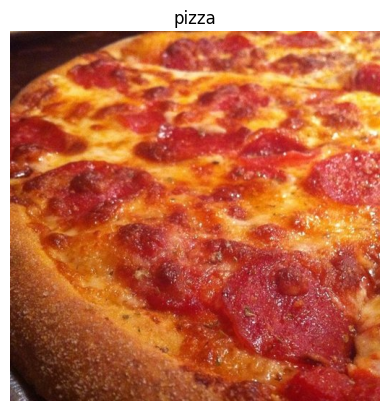

In [ ]:
# View a random image

img = view_random_image(target_dir='pizza_steak/train/',
                        target_class='pizza')

In [ ]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[180, 150, 122],
        [175, 145, 117],
        [175, 145, 117],
        ...,
        [197, 107,  72],
        [196, 106,  71],
        [198, 108,  73]],

       [[148, 118,  94],
        [142, 112,  86],
        [142, 112,  88],
        ...,
        [203, 114,  80],
        [205, 115,  81],
        [203, 114,  80]],

       [[119,  90,  72],
        [111,  83,  62],
        [110,  81,  63],
        ...,
        [194, 108,  75],
        [197, 108,  76],
        [192, 106,  73]],

       ...,

       [[ 82,  56,  65],
        [ 94,  69,  75],
        [ 99,  74,  78],
        ...,
        [156,  37,  31],
        [158,  35,  30],
        [157,  34,  29]],

       [[ 81,  56,  62],
        [ 90,  65,  71],
        [ 96,  71,  75],
        ...,
        [164,  45,  39],
        [157,  34,  29],
        [150,  27,  22]],

       [[ 83,  58,  64],
        [ 88,  63,  67],
        [ 95,  70,  74],
        ...,
        [162,  43,  3

In [ ]:
# Get all the pixel values between 0 & 1
img/255 # 255 is the max value for a pixel

array([[[0.70588235, 0.58823529, 0.47843137],
        [0.68627451, 0.56862745, 0.45882353],
        [0.68627451, 0.56862745, 0.45882353],
        ...,
        [0.77254902, 0.41960784, 0.28235294],
        [0.76862745, 0.41568627, 0.27843137],
        [0.77647059, 0.42352941, 0.28627451]],

       [[0.58039216, 0.4627451 , 0.36862745],
        [0.55686275, 0.43921569, 0.3372549 ],
        [0.55686275, 0.43921569, 0.34509804],
        ...,
        [0.79607843, 0.44705882, 0.31372549],
        [0.80392157, 0.45098039, 0.31764706],
        [0.79607843, 0.44705882, 0.31372549]],

       [[0.46666667, 0.35294118, 0.28235294],
        [0.43529412, 0.3254902 , 0.24313725],
        [0.43137255, 0.31764706, 0.24705882],
        ...,
        [0.76078431, 0.42352941, 0.29411765],
        [0.77254902, 0.42352941, 0.29803922],
        [0.75294118, 0.41568627, 0.28627451]],

       ...,

       [[0.32156863, 0.21960784, 0.25490196],
        [0.36862745, 0.27058824, 0.29411765],
        [0.38823529, 0

## An end-to-end example

* Convolution neural network:
  * Load the images
  * Preprocess the images
  * Build a CNN
  * Compile the CNN
  * Fit the CNN

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 0 and 1)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup paths to the data directory
train_dir = '/content/pizza_steak/train'
test_dir = 'pizza_steak/test'

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32,
                                               target_size=(224, 224), # common size
                                               class_mode='binary',
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224), # common size
                                               class_mode='binary',
                                               seed=42)

# Build a CNN model (same as the Tiny VGG on the CNN explained website)
model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation='relu',
                           input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding='valid'),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the CNN
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=(len(train_data)),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 14s 255ms/step - loss: 0.5651 - accuracy: 0.6933 - val_loss: 0.4451 - val_accuracy: 0.7940
Epoch 2/5
47/47 [==============================] - 11s 240ms/step - loss: 0.4183 - accuracy: 0.8100 - val_loss: 0.3583 - val_accuracy: 0.8380
Epoch 3/5
47/47 [==============================] - 7s 141ms/step - loss: 0.3981 - accuracy: 0.8293 - val_loss: 0.3475 - val_accuracy: 0.8540
Epoch 4/5
47/47 [==============================] - 5s 113ms/step - loss: 0.3536 - accuracy: 0.8540 - val_loss: 0.3233 - val_accuracy: 0.8620
Epoch 5/5
47/47 [==============================] - 6s 136ms/step - loss: 0.3147 - accuracy: 0.8733 - val_loss: 0.3621 - val_accuracy: 0.8540


In [ ]:
model_1.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_29 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 110, 110, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_30 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_31 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 53, 53, 10)       0         
 g2D)                                                

## Using the same model as before

In [ ]:
# Set the seed
tf.random.set_seed(42)

# Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_2.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 6s 107ms/step - loss: 0.9760 - accuracy: 0.4993 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 6s 122ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 5s 117ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 5s 104ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 5s 106ms/step - loss: 0.6932 - accuracy: 0.4893 - val_loss: 0.6931 - val_accuracy: 0.5000


In [ ]:
# Summary of model_2
model_2.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_12 (Flatten)        (None, 150528)            0         
                                                                 
 dense_16 (Dense)            (None, 4)                 602116    
                                                                 
 dense_17 (Dense)            (None, 4)                 20        
                                                                 
 dense_18 (Dense)            (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


Despite having 20x more parameters than the CNN model, model_2 performs terribly

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224 ,3)),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model
history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 7s 111ms/step - loss: 2.5120 - accuracy: 0.6100 - val_loss: 0.7589 - val_accuracy: 0.7200
Epoch 2/5
47/47 [==============================] - 6s 132ms/step - loss: 0.7768 - accuracy: 0.7233 - val_loss: 0.7220 - val_accuracy: 0.7480
Epoch 3/5
47/47 [==============================] - 6s 125ms/step - loss: 0.5961 - accuracy: 0.7467 - val_loss: 1.5417 - val_accuracy: 0.5720
Epoch 4/5
47/47 [==============================] - 6s 138ms/step - loss: 0.7269 - accuracy: 0.7247 - val_loss: 0.5191 - val_accuracy: 0.7900
Epoch 5/5
47/47 [==============================] - 5s 105ms/step - loss: 0.5992 - accuracy: 0.7427 - val_loss: 0.6891 - val_accuracy: 0.7000


In [ ]:
# Get a summary of model_3
model_3.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_13 (Flatten)        (None, 150528)            0         
                                                                 
 dense_19 (Dense)            (None, 100)               15052900  
                                                                 
 dense_20 (Dense)            (None, 100)               10100     
                                                                 
 dense_21 (Dense)            (None, 100)               10100     
                                                                 
 dense_22 (Dense)            (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


## Binary Classification: Breaking the process
1. Become one with the data
2. Prprocess the data
3. Create a model
4. Fit the model
5. Evaluate the model
6. Adjust parameters and imporve the model
7. Repeat


### 1. Become one with the data

Image shape: (384, 512, 3)
Image shape: (512, 512, 3)


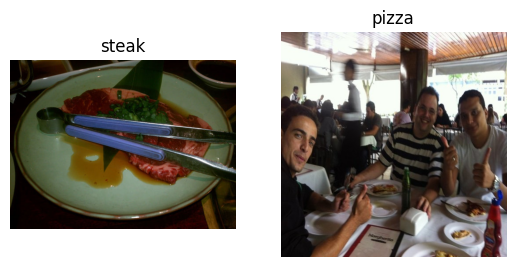

In [ ]:
# Viualize data

plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image('pizza_steak/train/', 'steak')

plt.subplot(1, 2, 2)
steak_img = view_random_image('pizza_steak/train/', 'pizza')

### 2. Preprocess the data

In [ ]:
# Define directory dataset paths
train_dir = 'pizza_steak/train/'
test_dir = 'pizza_steak/test/'

Turn the data into batches

Reasons:
1. +10.000 might not fit into the memory of the processor.
2. Trying to learn the pattern in +10.000 images in one hit could result in the model not being able to learn very well.

In [ ]:
# Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [ ]:
# Load in our image data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224, 224),
                                               class_mode='binary',
                                               batch_size=32)

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                               target_size=(224, 224),
                                               class_mode='binary',
                                               batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
# Get a sample of a train data batch
images, labels = train_data.next() # get the next batch of image/labels
len(images), len(labels)

(32, 32)

In [ ]:
# How many batches are there
len(train_data)

47

In [ ]:
# Get the firsttwo images
images[:2], images[0].shape

(array([[[[0.47058827, 0.40784317, 0.34509805],
          [0.48627454, 0.42352945, 0.36078432],
          [0.48627454, 0.43529415, 0.37254903],
          ...,
          [0.82745105, 0.7137255 , 0.48627454],
          [0.8431373 , 0.7372549 , 0.5294118 ],
          [0.87843144, 0.77647066, 0.58431375]],
 
         [[0.50980395, 0.427451  , 0.36078432],
          [0.5058824 , 0.42352945, 0.35686275],
          [0.5137255 , 0.4431373 , 0.3647059 ],
          ...,
          [0.82745105, 0.7058824 , 0.48235297],
          [0.82745105, 0.70980394, 0.49803925],
          [0.8431373 , 0.73333335, 0.5372549 ]],
 
         [[0.5254902 , 0.427451  , 0.34901962],
          [0.5372549 , 0.43921572, 0.36078432],
          [0.5372549 , 0.45098042, 0.36078432],
          ...,
          [0.82745105, 0.7019608 , 0.4784314 ],
          [0.82745105, 0.7058824 , 0.4901961 ],
          [0.8352942 , 0.7176471 , 0.5137255 ]],
 
         ...,
 
         [[0.77647066, 0.5647059 , 0.2901961 ],
          [0.77647

In [ ]:
images[7].shape, images[7]

((224, 224, 3),
 array([[[0.30588236, 0.17254902, 0.227451  ],
         [0.34901962, 0.21960786, 0.25490198],
         [0.4039216 , 0.2784314 , 0.2901961 ],
         ...,
         [0.16470589, 0.02745098, 0.1137255 ],
         [0.16862746, 0.01960784, 0.11764707],
         [0.15686275, 0.00784314, 0.10588236]],
 
        [[0.28235295, 0.14901961, 0.20392159],
         [0.34117648, 0.21176472, 0.24705884],
         [0.42352945, 0.29803923, 0.30980393],
         ...,
         [0.17254902, 0.02352941, 0.1137255 ],
         [0.1764706 , 0.02745098, 0.11764707],
         [0.16078432, 0.01176471, 0.10980393]],
 
        [[0.26666668, 0.13333334, 0.19607845],
         [0.32941177, 0.20000002, 0.23529413],
         [0.42352945, 0.29803923, 0.31764707],
         ...,
         [0.19215688, 0.04313726, 0.13333334],
         [0.1764706 , 0.02745098, 0.11764707],
         [0.16862746, 0.03137255, 0.1254902 ]],
 
        ...,
 
        [[0.62352943, 0.5803922 , 0.5647059 ],
         [0.6039216 , 0.5

In [ ]:
# View the first batch of labels
labels

array([1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
      dtype=float32)

### 3. Create the model (CNN)

A baseline is a relatively simple model or existing result that you setup when beginnig a machine learning experiment and then as you keep experimenting, you try to beat the baseline

In [ ]:
# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [ ]:
# Create the model
model_4 = Sequential([
    Conv2D(filters=10,
           kernel_size=3,
           strides=1,
           padding='valid',
           activation='relu',
           input_shape=(224, 224, 3)),
    Conv2D(10, 3, activation='relu'),
    Conv2D(10, 3, activation='relu'),
    Flatten(),
    Dense(1, activation='sigmoid')
])

In [ ]:
# Compile the model
model_4.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

In [ ]:
# Get the summary
model_4.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_32 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_33 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 conv2d_34 (Conv2D)          (None, 218, 218, 10)      910       
                                                                 
 flatten_14 (Flatten)        (None, 475240)            0         
                                                                 
 dense_23 (Dense)            (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


### 4. Fit the model

In [ ]:
# Check the len
len(train_data), len(test_data)

(47, 16)

In [ ]:
# Fit the model
history_4 = model_4.fit(train_data, # this is a combination of labels and sample data
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 8s 141ms/step - loss: 1.3108 - accuracy: 0.6480 - val_loss: 0.4532 - val_accuracy: 0.7980
Epoch 2/5
47/47 [==============================] - 7s 144ms/step - loss: 0.4393 - accuracy: 0.8100 - val_loss: 0.3645 - val_accuracy: 0.8500
Epoch 3/5
47/47 [==============================] - 5s 113ms/step - loss: 0.3147 - accuracy: 0.8727 - val_loss: 0.4072 - val_accuracy: 0.8180
Epoch 4/5
47/47 [==============================] - 6s 121ms/step - loss: 0.2455 - accuracy: 0.9107 - val_loss: 0.3345 - val_accuracy: 0.8580
Epoch 5/5
47/47 [==============================] - 5s 113ms/step - loss: 0.1466 - accuracy: 0.9620 - val_loss: 0.4375 - val_accuracy: 0.8100


### 5. Evaluating our model


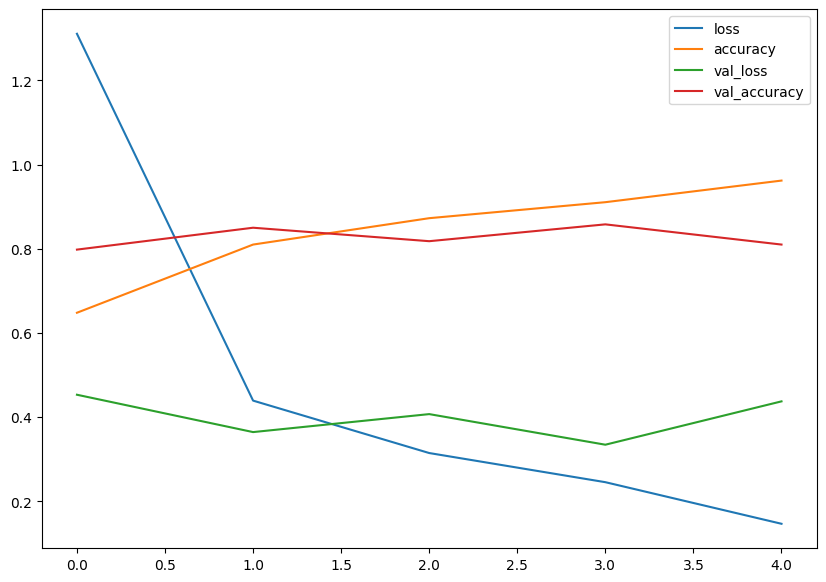

In [ ]:
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10, 7));

In [ ]:
# plot the val and train curves separately

def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics
  """

  loss = history.history['loss']
  val_loss = history.history['val_loss']
  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss'])) # How many epochs did we run for?

  # Plot loss
  plt.plot(epochs, loss, label='training loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('loss')
  plt.xlabel('epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('accuracy')
  plt.xlabel('epochs')
  plt.legend()

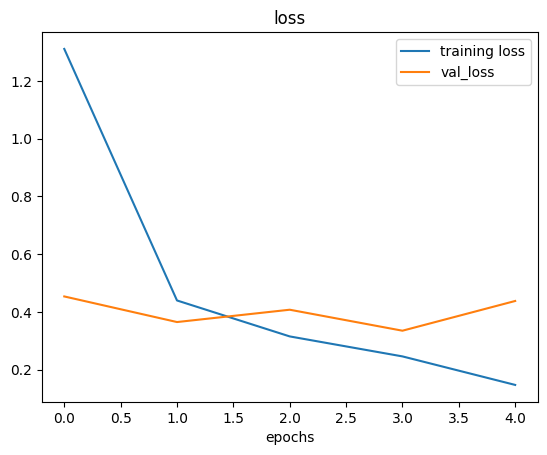

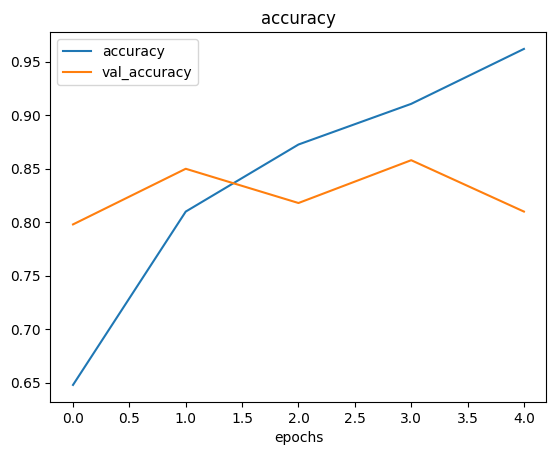

In [ ]:
plot_loss_curves(history_4)

### 6. Aadjust the model

Steps:
1. Create a baseline
2. Beat the baseline by overfitting
3. Reduce overfitting

Ways to induce the number of conv filters:
* Increase the number of conv layers
* Increase the number of conv filters
* add another layer to the output our flattened layer

Reduce overfitting (Regularization):
* Add data augmentation
* Add regularization layers
* Add more data

In [ ]:
# Create the model
model_5 = Sequential([
    Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
])

In [ ]:
# Compile the model
model_5.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

In [ ]:
# Fit the model
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 8s 114ms/step - loss: 0.6463 - accuracy: 0.6147 - val_loss: 0.5664 - val_accuracy: 0.6980
Epoch 2/5
47/47 [==============================] - 6s 118ms/step - loss: 0.5124 - accuracy: 0.7567 - val_loss: 0.4080 - val_accuracy: 0.8340
Epoch 3/5
47/47 [==============================] - 6s 118ms/step - loss: 0.4485 - accuracy: 0.8040 - val_loss: 0.3661 - val_accuracy: 0.8500
Epoch 4/5
47/47 [==============================] - 5s 112ms/step - loss: 0.4039 - accuracy: 0.8240 - val_loss: 0.3654 - val_accuracy: 0.8280
Epoch 5/5
47/47 [==============================] - 6s 132ms/step - loss: 0.3750 - accuracy: 0.8360 - val_loss: 0.3099 - val_accuracy: 0.8700


In [ ]:
# Get a summary
model_5.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_35 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 111, 111, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_36 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 54, 54, 10)       0         
 g2D)                                                            
                                                                 
 conv2d_37 (Conv2D)          (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 26, 26, 10)     

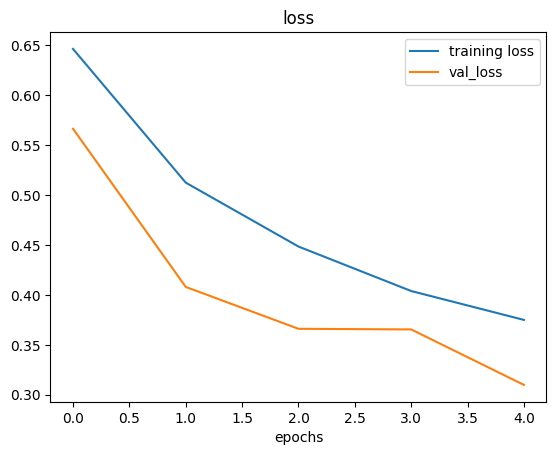

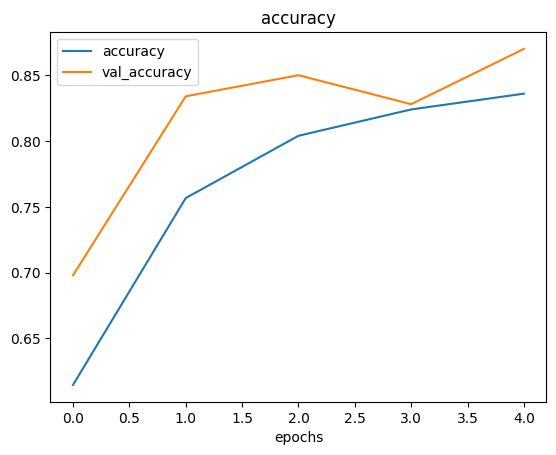

In [ ]:
# Plot loss curves
plot_loss_curves(history_5)

### Opening our bag of tricks and find data augmentation

In [ ]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             horizontal_flip=True)

# Create ImageDataGenerator without augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator without data augmentation
test_datagen = ImageDataGenerator(rescale=1/255.)

In [ ]:
# Import data and augment it from training directory
print('Augmented training data:')
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                  target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode='binary',
                                                                   shuffle=False) # For demonstration only

# Create non-augmented train data batches
print('Non-augmented training data:')
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=False)

# Create non-augmented test data batches
print('Non-augmented test data')
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='binary')

Augmented training data:
Found 1500 images belonging to 2 classes.
Non-augmented training data:
Found 1500 images belonging to 2 classes.
Non-augmented test data
Found 500 images belonging to 2 classes.


**NOTE:** Data augmentation is usually only performed in the training data. Using 'ImageDataGenerator' built-in data augmentation parameters our images are left as they are in the directories but are modified as they're loaded into the model.

In [ ]:
# Get sample data batches
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next() # Labels don't change

Random image number: 19


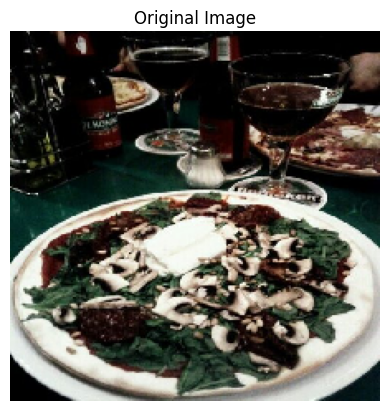

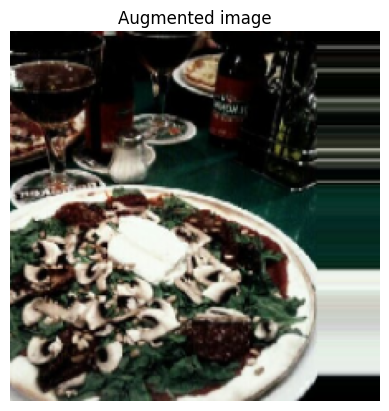

In [ ]:
# Show original image and augmented image
random_number = random.randint(0, 32)

print(f'Random image number: {random_number}')
plt.imshow(images[random_number])
plt.title('Original Image')
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title('Augmented image')
plt.axis(False);

Create a model for the augmented data

In [ ]:
# Create model
model_6 = Sequential([
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
])

# Compile
model_6.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_6 = model_6.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 22s 438ms/step - loss: 0.7335 - accuracy: 0.4593 - val_loss: 0.6887 - val_accuracy: 0.5040
Epoch 2/5
47/47 [==============================] - 20s 420ms/step - loss: 0.6889 - accuracy: 0.5073 - val_loss: 0.6829 - val_accuracy: 0.5160
Epoch 3/5
47/47 [==============================] - 21s 441ms/step - loss: 0.6945 - accuracy: 0.5227 - val_loss: 0.6699 - val_accuracy: 0.5440
Epoch 4/5
47/47 [==============================] - 19s 415ms/step - loss: 0.6914 - accuracy: 0.5533 - val_loss: 0.6773 - val_accuracy: 0.6720
Epoch 5/5
47/47 [==============================] - 20s 432ms/step - loss: 0.6816 - accuracy: 0.5887 - val_loss: 0.6530 - val_accuracy: 0.6260


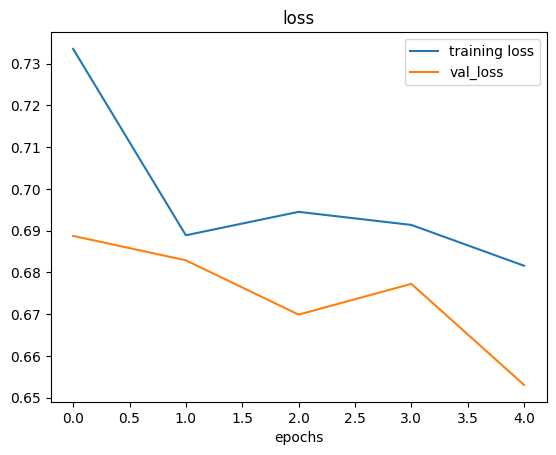

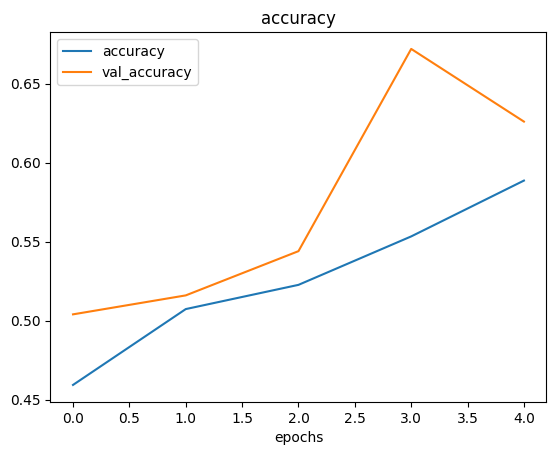

In [ ]:
# Check our models training curves
plot_loss_curves(history_6)

Let's shuffle our augmented training data

In [ ]:
# Import data and augment it and shuffle from training from training directory
print('Augmented training data:')
train_data_augmented_n_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                  target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode='binary')

Augmented training data:
Found 1500 images belonging to 2 classes.


In [ ]:
# Create the model
model_7 = Sequential([
    Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
])

# Compile the model
model_7.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_7 = model_7.fit(train_data_augmented_n_shuffled,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_n_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 29s 589ms/step - loss: 0.6267 - accuracy: 0.6387 - val_loss: 0.6054 - val_accuracy: 0.6460
Epoch 2/5
47/47 [==============================] - 20s 414ms/step - loss: 0.5386 - accuracy: 0.7207 - val_loss: 0.3873 - val_accuracy: 0.8400
Epoch 3/5
47/47 [==============================] - 21s 457ms/step - loss: 0.4957 - accuracy: 0.7653 - val_loss: 0.3741 - val_accuracy: 0.8460
Epoch 4/5
47/47 [==============================] - 19s 407ms/step - loss: 0.4851 - accuracy: 0.7780 - val_loss: 0.3397 - val_accuracy: 0.8580
Epoch 5/5
47/47 [==============================] - 20s 428ms/step - loss: 0.4627 - accuracy: 0.7893 - val_loss: 0.3431 - val_accuracy: 0.8600


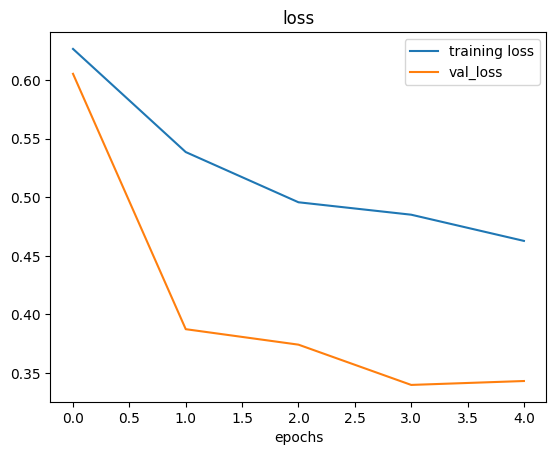

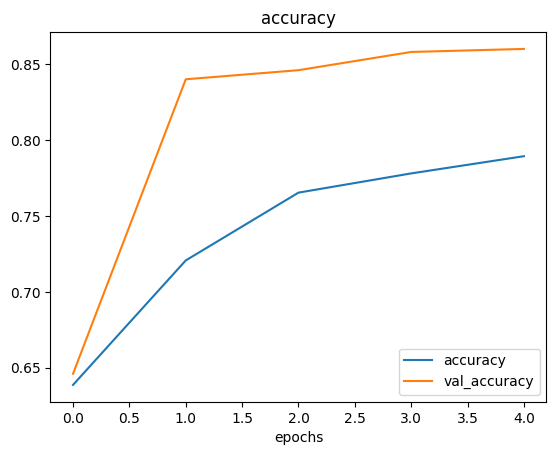

In [ ]:
# Plot loss curves
plot_loss_curves(history_7)

### 7. Repeat until satisfied

How to improve the model:
* Increase the number of model layers
* Increase the number of filters in each convolutional layer
* Train for longer
* Find an ideal learning rate
* Get more data
* Use **transfer learning** to leverage what another image model has learn and adjust it for our own use case

## Making a predictiom with our trained model on our own custom data

In [ ]:
# View our exaple image
import matplotlib.image as mpimg
!wget https://github.com/mrdbourke/tensorflow-deep-learning/blob/ff0a93f68915e85bcb509a0c636d16f4567fbf8a/images/03-steak.jpeg

--2023-08-17 13:35:34--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/blob/ff0a93f68915e85bcb509a0c636d16f4567fbf8a/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2023-08-17 13:35:35 ERROR 404: Not Found.



In [ ]:
steak = mpimg.imread('/content/03-steak.jpeg')

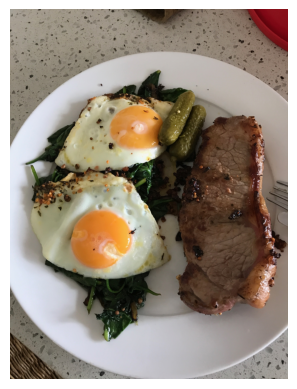

In [ ]:
plt.imshow(steak)
plt.axis(False);

In [ ]:
# Check the shape of our image
steak.shape

(4032, 3024, 3)

In [ ]:
# Create a function to import and resize it to be able to be used on our model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor and reshapes it to (img_shape, img_shape, color_channels)
  """
  # Read in the image
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor
  img = tf.image.decode_image(img)

  # Resize the image
  img = tf.image.resize(img, size=[img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img/255.

  return img

In [ ]:
# Load in and preprocess our custom image
steak = load_and_prep_image('03-steak.jpeg')
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [ ]:
pred = model_7.predict(tf.expand_dims(steak, axis=0))

1/1 [==============================] - 0s 30ms/step


In [ ]:
# Class names
class_names

array(['pizza', 'steak'], dtype='<U5')

In [ ]:
# We can index the predicted class by rounding the prediction probability and indexing it on the class names
pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

In [ ]:
def pred_and_plot(model, filename, class_names=class_names):
  """
  Imports an image located at filename, makes a prediction with model and plots
  the image with the predictd class as the title
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred))]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f'Predicition: {pred_class}')
  plt.axis(False);

1/1 [==============================] - 0s 67ms/step


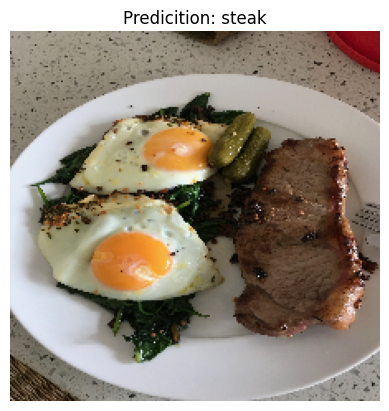

In [ ]:
# Test our model
pred_and_plot(model_7, '/content/03-steak.jpeg')